In [7]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatText
import ipywidgets as widgets

SNHU_math = pd.read_csv("https://raw.githubusercontent.com/agmath/agmath.github.io/master/data/linear/SNHU_math.csv", header = None, names = ["x1", "x2"])
SNHU_math["x2"] = -SNHU_math["x2"] + 119
SNHU_math["x1"] = SNHU_math["x1"] - 315

## Warm-Up Problems

Consider the following warm-up problems as we wait for class to begin.

**Warm-Up Problem 1:** Determine whether each of the following statements are true or false. Justify your response.

+ The range of the linear transformation $T\left(\vec{x}\right) = A\vec{x}$ is the set of all linear combinations of the rows of $A$.
+ Every matrix transformation is a linear transformation.
+ If $T: \mathbb{R}^n \to \mathbb{R}^m$ is a linear transformation and if $\vec{b}$ is in $\mathbb{R}^m$, then an example of a *uniqueness* question is whether $\vec{b}$ is in the range of $T$.
+ A linear transformation preserves the operations of vector addition and scalar multiplication.
+ A linear transformation from $\mathbb{R}^n\to \mathbb{R}^m$ always maps the origin (zero vector) from $\mathbb{R}^n$ to the origin (zero vector) of $\mathbb{R}^m$.

**Warm-Up Problem 2:** Let $T: \mathbb{R}^2 \to \mathbb{R}^2$ be a linear transformation that mapst $\vec{u} = \left[\begin{array}{r} 3\\ 4\end{array}\right]$ to $\left[\begin{array}{r} 4\\ 1\end{array}\right]$ and maps $\vec{v} = \left[\begin{array}{r} 3\\ 3\end{array}\right]$ to $\left[\begin{array}{r} -1\\ 3\end{array}\right]$. Use the fact that $T$ is *linear* to find the images of $2\vec{u}$, $3\vec{v}$, and $2\vec{u} = 3\vec{v}$ under $T$.

> *Solution.*

# Day 13: The Geometry of Linear Transformations

Recall the definition of a linear transformation from the previous notebook.

**Definition (Linear Transformation):** A transformation $T$ is linear if and only if $T\left(\vec{u} + c\vec{v}\right) = T\left(\vec{u}\right) + cT\left(\vec{v}\right)$.

In that previous notebook, we also saw that matrix multiplication corresponds to a linear transformation. That is, given an $m\times n$ matrix $A$, the transformation $T: \mathbb{R}^n\to \mathbb{R}^m$ defined by $T\left(\vec{x}\right) = A\vec{x}$ is a linear transformation. In fact, the following theorem holds true:

**Theorem (Matrix Representation of a Linear Transformation):** Given any linear transformation $T:\mathbb{R}^n\to \mathbb{R}^m$, there exists an $m\times n$ matrix $A$ such that $T\left(\vec{x}\right) = A\vec{x}$.

In this notebook we'll consider the forms of matrices to achieve different types of linear transformations. In particular, we'll consider geometric goals for a linear transformation and construct/identify the matrix corresponding to the linear transformation which would accomplish those goals.

**Remark:** In exposing ourselves to different types of matrix transformations, it will be helpful to work with an organized collection of points rather than just a single point at a time. The collecton of points below will be used to help us understand matrix transformations visually.

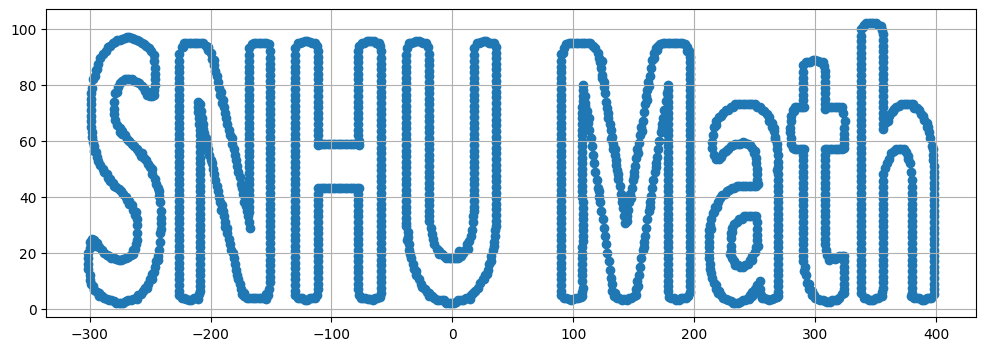

In [ ]:
#@title
plt.figure(figsize = (12, 4))
plt.scatter(SNHU_math["x1"], SNHU_math["x2"])
plt.grid()

Before we move too far forward, it is worth recognizing the following definition and theorem.

**Definition (Identity Matrix):** An $n\times n$ matrix of the form $\left[\begin{array}{cccc}1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & 1\end{array}\right]$ is denoted by $I_n$ and called the $n\times n$ *identity matrix* since, for any $\vec{x}\in\mathbb{R}^n$, $I_n\vec{x} = \vec{x}$.

+ Note that any identity matrix must be a square matrix.

**Theorem (Standard Matrix of a Linear Transformation):** Consider any linear transformation $T:\mathbb{R}^n\to \mathbb{R}^m$. There exists a unique $m\times n$ matrix $A$ such that $T\left(\vec{x}\right) = A\vec{x}$ for all $\vec{x}\in\mathbb{R}^n$. In fact, $A$ is the $m\times n$ matrix whose $j^{th}$ column is the vector $T\left(\vec{e_j}\right)$, where $\vec{e_j}$ is the vector corresponding to the $j^{th}$ column of the $n\times n$ identity matrix. This means that $A = \left[\begin{array}{rrrr} T\left(\vec{e_1}\right) & T\left(\vec{e_2}\right) & \cdots & T\left(\vec{e_n}\right)\end{array}\right]$.

**Definition (Identity Transformation):** Define a matrix transformation of the form $T\left(\vec{x}\right) = I_n\vec{x}$. Such a transformation leaves the vector $\vec{x}$ in place.

**Example:** Let's see how the transformation $T\left(\vec{x}\right) = I_2\vec{x}$ impacts our `SNHU Math` collection of vectors.

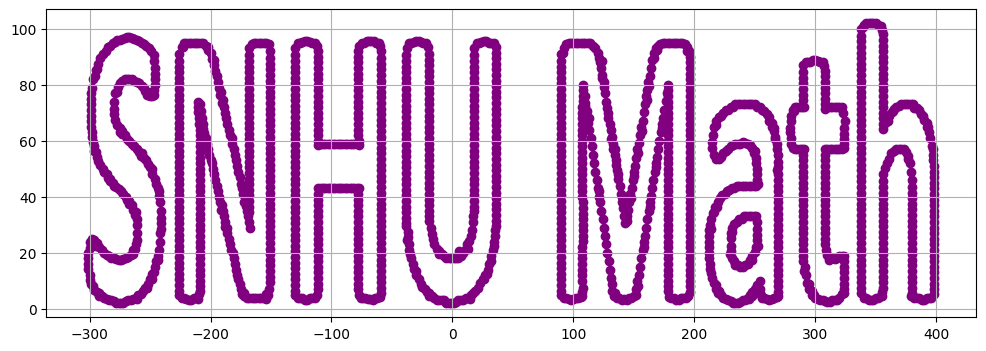

In [ ]:
#@title
sm_identity = SNHU_math
sm_identity["x1"] = 1*SNHU_math["x1"] + 0*SNHU_math["x2"]
sm_identity["x2"] = 0*SNHU_math["x1"] + 1*SNHU_math["x2"]

plt.figure(figsize = (12, 4))
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_identity["x1"], sm_identity["x2"], color = "purple")
plt.grid()

**Definition (Projections):** A transformation of the form $T\left(\vec{x}\right) = P\vec{x}$, where the matrix $P$ takes the form of an identity matrix which has some $1$'s along its diagonal replaced by $0$'s is called a *projection*. Projections "zero-out" vector components whose positions correspond to $0$'s along the diagonal of $P$. For example, the matrix $P = \left[\begin{array}{rrrr} 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 0\end{array}\right]$ corresponds to a transformation which projects $\mathbb{R}^4$ onto the $x_1x_3$-plane because

\begin{align*} P\vec{x} &= \left[\begin{array}{rrrr} 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 0\end{array}\right]\left[\begin{array}{r}x_1\\ x_2\\ x_3\\ x_4\end{array}\right]\\
&= \left[\begin{array}{r} x_1\\ 0\\ x_3\\ 0\end{array}\right]
\end{align*}

**Example:** The top plot below shows a projection onto $x_1$ via the transformation matrix $A_1 = \left[\begin{array}{rr} 1 & 0\\ 0 & 0\end{array}\right]$, while the bottom plot shows a projections onto $x_2$ via the transformation matrix $A_2 = \left[\begin{array}{rr} 0 & 0\\ 0 & 1\end{array}\right]$.

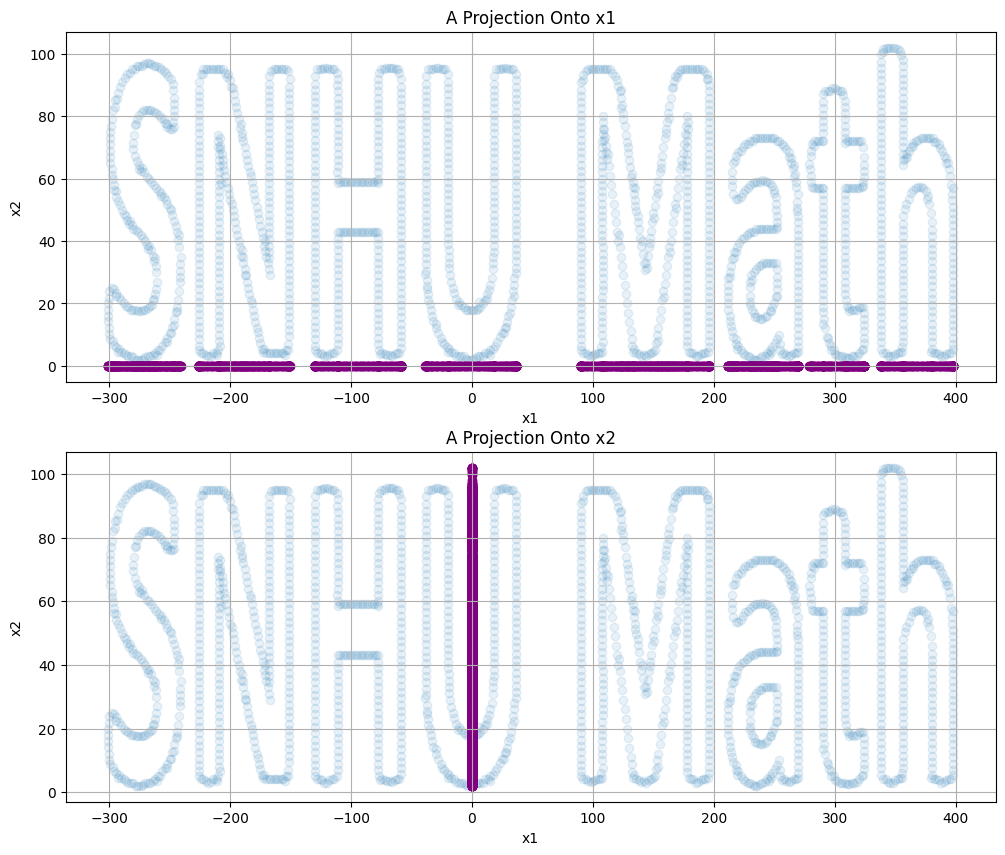

In [ ]:
#@title
A_x1 = np.array([[1, 0], [0, 0]])
A_x2 = np.array([[0, 0], [0, 1]])

sm_proj_x1 = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_proj_x1.loc[i, :] = np.matmul(A_x1, np.array(SNHU_math.iloc[i, :]))

sm_proj_x2 = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_proj_x2.loc[i, :] = np.matmul(A_x2, np.array(SNHU_math.iloc[i, :]))

plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_proj_x1["x1"], sm_proj_x1["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Projection Onto x1")

plt.subplot(2, 1, 2)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_proj_x2["x1"], sm_proj_x2["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Projection Onto x2")

plt.show()

**Definition (Contraction and Dilation Transformations):** A transformation of the form $T\left(\vec{x}\right) = r\vec{x}$ (or equivalently $T\left(\vec{x}\right) = rI_n\vec{x}$), is called a *dilation* when $r > 1$ and a contraction when $0 \leq r < 1$.

**Example:** The top plot below shows a *dilation* with $r = 1.25$, and the bottom shows a *contraction* with $r = 0.5$.

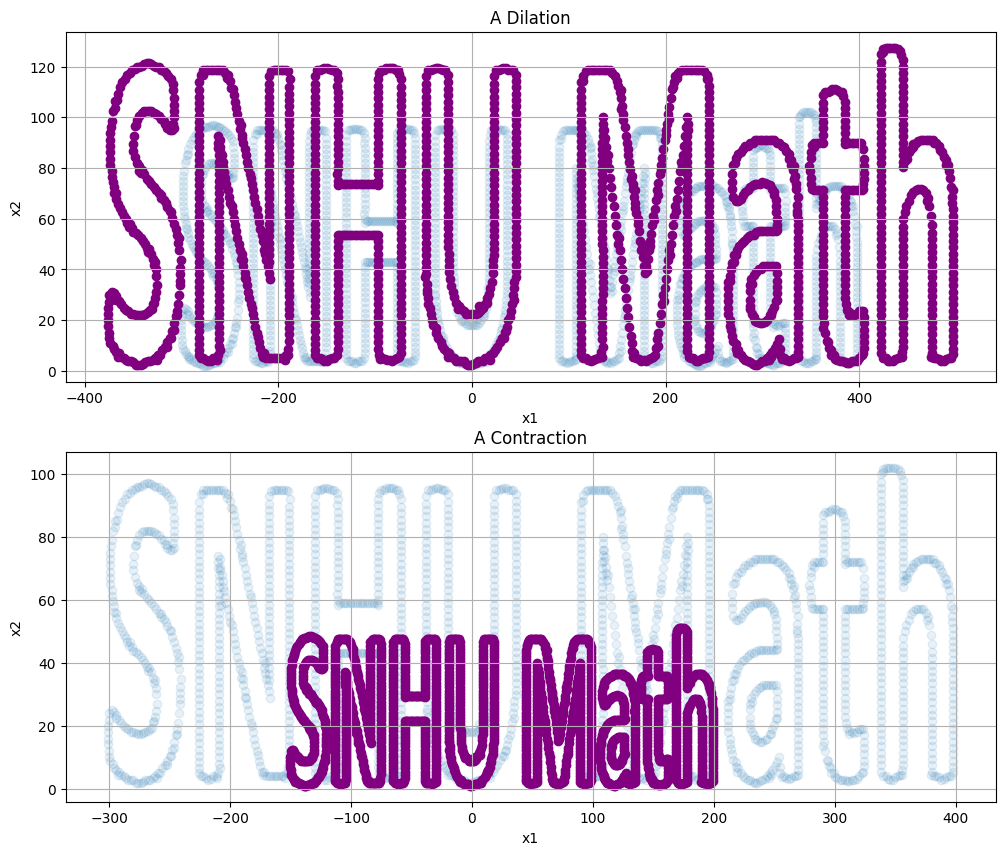

In [ ]:
#@title
A_dilate = np.array([[1.25, 0], [0, 1.25]])
A_contract = np.array([[0.5, 0], [0, 0.5]])

sm_dilation = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_dilation.loc[i, :] = np.matmul(A_dilate, np.array(SNHU_math.iloc[i, :]))

sm_contract = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_contract.loc[i, :] = np.matmul(A_contract, np.array(SNHU_math.iloc[i, :]))

plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_dilation["x1"], sm_dilation["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Dilation")

plt.subplot(2, 1, 2)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_contract["x1"], sm_contract["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Contraction")

plt.show()

**Remark:** You might notice that in both the *dilation* and *contraction*, the low-point of the "U" remained at the origin.

**Definition (Shear Transformation):** A matrix which replaces a component of a vector with a linear combination of itself and its other components corresponds to a transformation called a *shear transformation*. For example, the matrix $a = \left[\begin{array}{rr} 1 & s\\ 0 & 1\end{array}\right]$ where $s\neq 0$ is a two-dimensional horizontal shear. Similarly, the matrix $B = \left[\begin{array}{rrr} 1 & s_1 & s_2\\ 0 & 1 & 0\\ 0 & 0 & 1\end{array}\right]$ is a horizontal shear in three dimensions. If the shearing elements appear in the second row, then it is a *vertical* shear.

**Example:** The top plot below shows a *horizontal shear* using the matrix $A = \left[\begin{array}{rr} 1 & 2\\ 0 & 1\end{array}\right]$ while the bottom plot shows a *vertical shear* using the matrix $A = \left[\begin{array}{rr} 1 & 0\\ 0.5 & 1\end{array}\right]$.

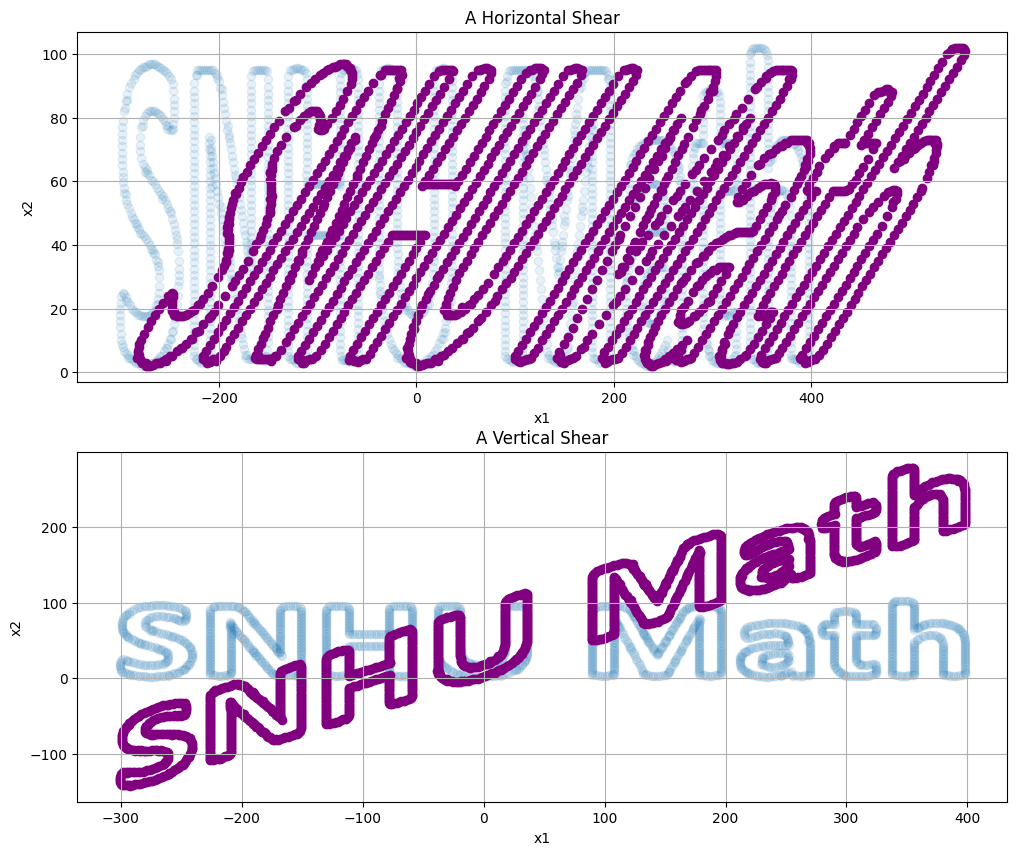

In [ ]:
#@title
A_horiz_shear = np.array([[1, 2], [0, 1]])
A_vert_shear = np.array([[1, 0], [0.5, 1]])

sm_horiz_shear = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_horiz_shear.loc[i, :] = np.matmul(A_horiz_shear, np.array(SNHU_math.iloc[i, :]))

sm_vert_shear = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_vert_shear.loc[i, :] = np.matmul(A_vert_shear, np.array(SNHU_math.iloc[i, :]))

plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_horiz_shear["x1"], sm_horiz_shear["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Horizontal Shear")

plt.subplot(2, 1, 2)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_vert_shear["x1"], sm_vert_shear["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Vertical Shear")

plt.show()

**Remark:** Perhaps again you have noticed that the low-point of the "U" has continud to remain fixed at $\vec{0}$.

**Definition (Reflections):** There are many different types of reflections which can be achieved via linear transformations.

+ A linear transformation corresponding to left-multiplication by the matrix $R_h = \left[\begin{array}{rr} 1 & 0\\ 0 & -1\end{array}\right]$ results in a reflection across the $x_1$ axis.
+ A linear transformation corresponding to left-multiplication by the matrix $R_h = \left[\begin{array}{rr} -1 & 0\\ 0 & 1\end{array}\right]$ results in a reflection across the $x_2$ axis.
+ A linear transformation corresponding to left-multiplication by the matrix $R_h = \left[\begin{array}{rr} 0 & 1\\ 1 & 0\end{array}\right]$ results in a reflection through the line $x_2 = x_1$.
+ A linear transformation corresponding to left-multiplication by the matrix $R_h = \left[\begin{array}{rr} 0 & -1\\ -1 & 0\end{array}\right]$ results in a reflection across the line $x_2 = -x_1$.
+ A linear transformation corresponding to left-multiplication by the matrix $R_h = \left[\begin{array}{rr} -1 & 0\\ 0 & -1\end{array}\right]$ results in a reflection across through the origin.

We can see each of the following below.

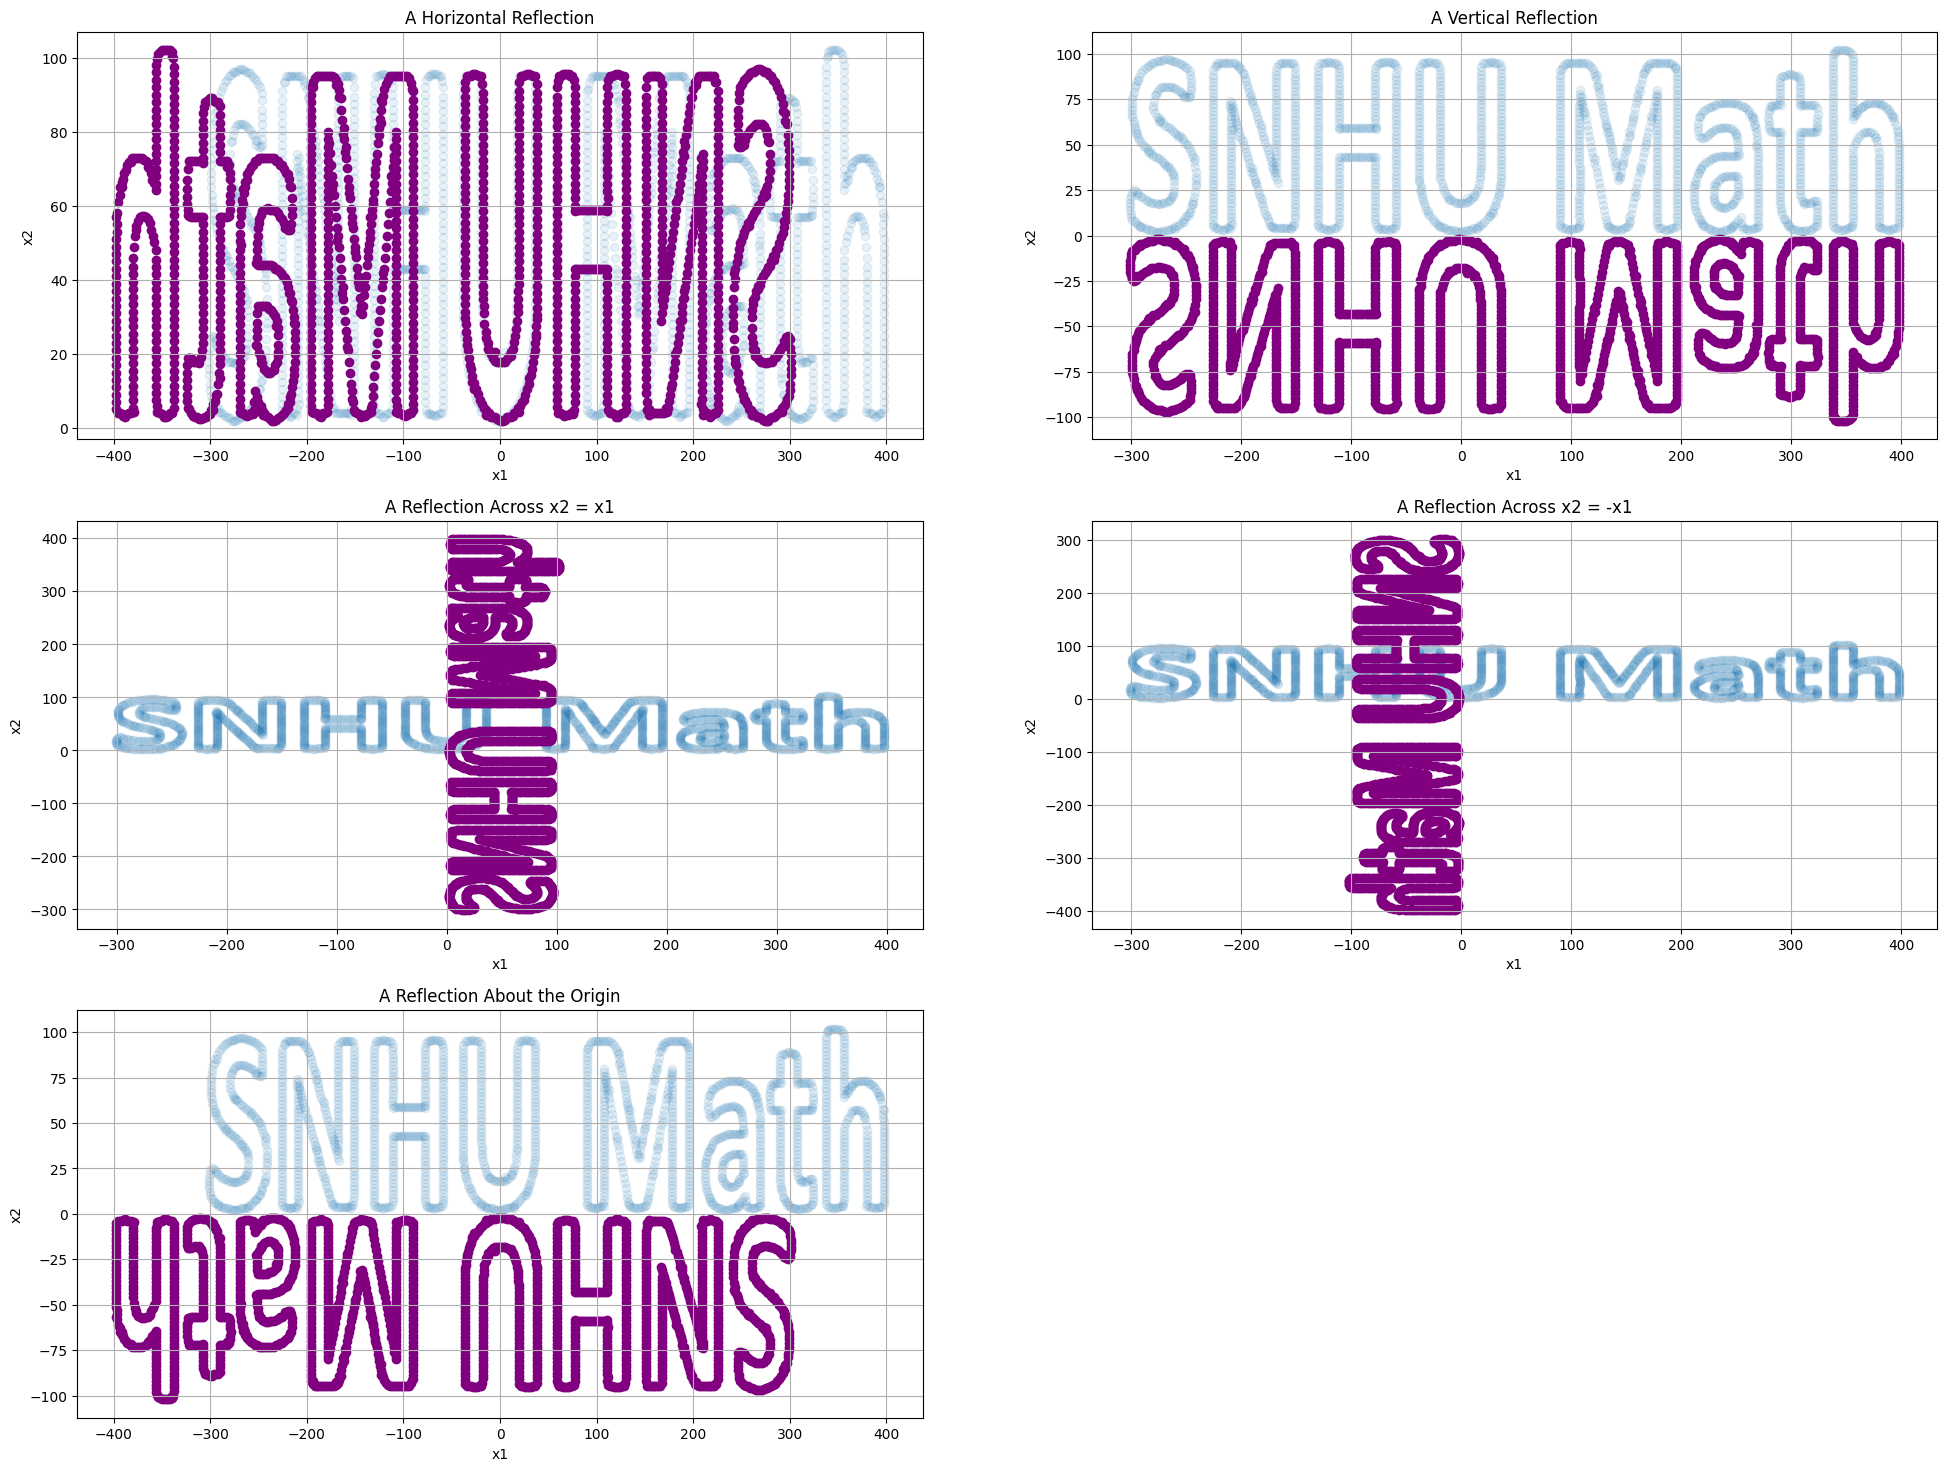

In [ ]:
#@title
A_horiz_reflect = np.array([[-1, 0], [0, 1]])
A_vert_reflect = np.array([[1, 0], [0, -1]])
A_yx = np.array([[0, 1], [1, 0]])
A_neg_yx = np.array([[0, -1], [-1, 0]])
A_origin = np.array([[-1, 0], [0, -1]])

sm_horiz_reflect = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_horiz_reflect.loc[i, :] = np.matmul(A_horiz_reflect, np.array(SNHU_math.iloc[i, :]))

sm_vert_reflect = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_vert_reflect.loc[i, :] = np.matmul(A_vert_reflect, np.array(SNHU_math.iloc[i, :]))

sm_45_reflect = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_45_reflect.loc[i, :] = np.matmul(A_yx, np.array(SNHU_math.iloc[i, :]))

sm_135_reflect = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_135_reflect.loc[i, :] = np.matmul(A_neg_yx, np.array(SNHU_math.iloc[i, :]))

sm_origin_reflect = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_origin_reflect.loc[i, :] = np.matmul(A_origin, np.array(SNHU_math.iloc[i, :]))

plt.figure(figsize = (24, 18))

plt.subplot(3, 2, 1)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_horiz_reflect["x1"], sm_horiz_reflect["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Horizontal Reflection")

plt.subplot(3, 2, 2)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_vert_reflect["x1"], sm_vert_reflect["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Vertical Reflection")

plt.subplot(3, 2, 3)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_45_reflect["x1"], sm_45_reflect["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Reflection Across x2 = x1")

plt.subplot(3, 2, 4)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_135_reflect["x1"], sm_135_reflect["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Reflection Across x2 = -x1")

plt.subplot(3, 2, 5)
plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_origin_reflect["x1"], sm_origin_reflect["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Reflection About the Origin")

plt.show()

**Remark:** Again, you can notice that in every single one of the transformations above, the low-point of the "U" remains fixed at the "origin".

We've previously seen the *theorem* below as a *property* of linear transformations, but it is worth restating on its own.

**Theorem (Linear Transformations and $\vec{0}$):** If $T:\mathbb{R}^n\to\mathbb{R}^m$ is a linear transformation, then $T\left(\vec{0}_n\right) = \vec{0}_m$ where $\vec{0}_n$ and $\vec{0}_m$ are the $n$-component and $m$-component zero vectors respectively.

**Remark:** The *reflection about the origin* transformation is really a rotation of $\pi/2~\text{rad}$ (equivalently $180^\circ$). We can obtain a rotaton of any angle $\theta$ using the transformation matrix $\left[\begin{array}{rr}\cos\left(\theta\right) & -\sin\left(\theta\right)\\ \sin\left(\theta\right) & \cos\left(\theta\right)\end{array}\right]$.

**Example:** The transformation martrix $\left[\begin{array}{rr}\cos\left(5^\circ\right) & -\sin\left(5^\circ\right)\\ \sin\left(5^\circ\right) & \cos\left(5^\circ\right)\end{array}\right]$ results in a counter-clockwise rotation of a vector by $5^\circ$.

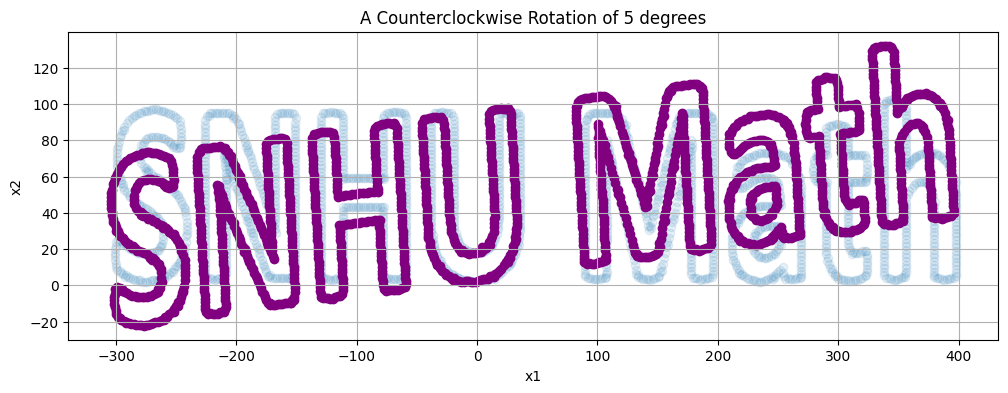

In [ ]:
#@title
angle = 5
A_rot60 = np.array([[np.cos(angle*np.pi/180), -np.sin(angle*np.pi/180)], [np.sin(angle*np.pi/180), np.cos(angle*np.pi/180)]])

sm_rot60 = SNHU_math.copy()
for i in range(len(SNHU_math)):
  sm_rot60.loc[i, :] = np.matmul(A_rot60, np.array(SNHU_math.iloc[i, :]))

plt.figure(figsize = (12, 4))

plt.scatter(SNHU_math["x1"], SNHU_math["x2"], alpha = 0.1)
plt.scatter(sm_rot60["x1"], sm_rot60["x2"], color = "purple")
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("A Counterclockwise Rotation of " + str(angle) + " degrees")

plt.show()

### Properties of Linear Transformations

Properties such as *one-to-one* and *onto* are likely familiar to you with respect to functions. These properties (with their usual definitions) apply to linear transformations.

**Definition (One-to-One):** A linear transformation $T:\mathbb{R}^n\to\mathbb{R}^m$ is *one-to-one* if and only if $T\left(\vec{v_1}\right) = T\left(\vec{v_2}\right)$ implies $\vec{v_1} = \vec{v_2}$.

**Definition (Onto):** A linear transformation $T:\mathbb{R}^n\to\mathbb{R}^m$ is *oto* if and only if for any $\vec{b}\in\mathbb{R}^m$ there exists a $\vec{v}\in\mathbb{R}^n$ such that $T\left(\vec{v}\right) = \vec{b}$.

**Theorem (One-to-One Linear Transformation):** A linear transformation $T:\mathbb{R}^n\to\mathbb{R}^m$ is *one-to-one* if and only if $T\left(\vec{x}\right) = \vec{0}$ has only the trivial solution ($\vec{x} = \vec{0}$).

**Theorem (One-to-One and Onto Linear Transformations):** Let $T:\mathbb{R}^n\to\mathbb{R}^m$ be a linear transformation whose standard matrix representation is $T\left(\vec{x}\right) = A\vec{x}$. Then,

+ $T$ maps $\mathbb{R}^n$ onto $\mathbb{R}^m$ is and only if the columns of $A$ span $\mathbb{R}^m$. That is, $A$ must have a pivot in every row.
+ $T$ is one-to-one if and only if the columns of $A$ are linearly independent. That is, $A$ must have a pivot in every column.

### Linear Transformations and Translations

In every transformation explored in this notebook, the low point on the "U" in our `SNHU Math` collection of points remained fixed at the zero vector. This will always($^*$) be the case, because a property of linear transformations is that $T\left(\vec{0}\right) = \vec{0}$. Always...unless we can ensure that the low point of that "U" doesn't sit at the origin.

Just repositioning the "text" in the plane won't allow us to truly move our graphic freely throughout space. This is because some point in space will still be assigned to the zero vector and, since our graphic lies on the same plane as that zero vector, all of the points in the graphic remain tied to that location in space. Can we move our graphic off of the plane containing the zero vector? Certainly not if we stay in $\mathbb{R}^2$, but if we move to $\mathbb{R}^3$ and make a strategic choice, we can!

We can move our graphic to a new plane within $\mathbb{R}^3$ -- a plane that doesn't contain the zero vector. For every point in our graphic at location $\begin{bmatrix} x\\ y\end{bmatrix}$, we'll give it an embedding in three dimensional space $\begin{bmatrix} x\\ y\\ 1\end{bmatrix}$. There's nothing special about the choice of $1$ for third coordinate -- any non-zero choice would work.

Now, using the transformation matrix $A = \begin{bmatrix} a & b & c\\ d & e & f\\ 0 & 0 & 1\end{bmatrix}$, we can truly move our graphic freely throughout the two-dimensional plane where $z = 1$.

+ The element $a$ governs horizontal stretching and reflections.
+ The element $e$ governs vertical stretching and reflections
+ The element $b$ governs horizontal shearing.
+ The element $d$ governs vertical shearing.
+ The element $c$ governs horizontal translation.
+ The element $f$ governs vertical translation.

Once we've performed the transformation via matrix multiplication by $A$, we can project back down to our two-dimensional space by using the projection matrix $P = \begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\end{bmatrix}$

Experiment below to verify how your choices of $a$, $b$, $c$, $d$, $e$, and $f$ move our graphic in the plane. I've made the points in the plot smaller to improve the clarity of our "graphic". The parameters attached to the interactive plot correspond to the transformation matrix below

$$\begin{bmatrix} a & b & c\\ d & e & f\\ 0 & 0 & 1\end{bmatrix}$$

In [14]:
# @title
snhu_math_homogeneous = SNHU_math.copy()
snhu_math_homogeneous["z"] = 1

# Convert DataFrame to NumPy array
def plot_transformation(a=1, b=0, c=0, d=0, e=1, f=0):
    A = np.array([
        [a, b, c],
        [d, e, f],
        [0, 0, 1]
    ])
    P = np.array([
        [1, 0, 0],
        [0, 1, 0]
    ])

    # Convert DataFrame to NumPy array
    points_homogeneous = snhu_math_homogeneous[["x1", "x2", "z"]].to_numpy().T

    # Apply transformation and project
    transformed = A @ points_homogeneous
    projected = P @ transformed

    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(snhu_math_homogeneous["x1"], snhu_math_homogeneous["x2"], c="C0", alpha=0.1, s = 1)
    plt.scatter(projected[0], projected[1], c='purple', alpha=0.8, s = 1)
    plt.title("Transformed Text using Homogeneous Coordinates")
    plt.grid(True)
    plt.axis('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Create interactive sliders
interact(
    plot_transformation,
    a=FloatText(value=1.0, min=-3, max=3, description='a'),
    b=FloatText(value=0.0, min=-3, max=3, description='b'),
    c=FloatText(value=0.0, min=-10, max=10, description='c'),
    d=FloatText(value=0.0, min=-3, max=3, description='d'),
    e=FloatText(value=1.0, min=-3, max=3, description='e'),
    f=FloatText(value=0.0, min=-10, max=10, description='f')
);

interactive(children=(FloatText(value=1.0, description='a'), FloatText(value=0.0, description='b'), FloatText(…

## Try It!

The following examples will be used as classwork.

**Try It! 1:** Let $T:\mathbb{R}^3\to\mathbb{R}^2$ be a linear transformation and let $T\left(\vec{e_1}\right) = \left[\begin{array}{r}5\\ 1\end{array}\right]$, $T\left(\vec{e_2}\right) = \left[\begin{array}{r} 0\\ 7\end{array}\right]$, and $T\left(\vec{e_3}\right) = \left[\begin{array}{r} -2\\ 2\end{array}\right]$. Construct the matrix $A$ corresponding to the standard matrix representation of $T$. That is, construct $A$ such that $T\left(\vec{x}\right) = A\vec{x}$ for all $\vec{x}\in\mathbb{R}^n$.

> *Solution.*

**Try It! 2:** Construct the standard matrix representation for $T:\mathbb{R}^2\to\mathbb{R}^2$ which is a shear transformation leaving $\vec{e_1}$ unchanged but mapping $\vec{e_2}$ to $\vec{e_1} -5\vec{e_2}$.

> *Solution.*

**Try It! 3:** Construct the standard matrix representation for $T:\mathbb{R}^2\to\mathbb{R}^2$ which first reflects the point through the horizontal ($x_1$) axis and then reflects points across the line $x_2 = x_1$.

> *Solution.*

**Try It! 4:** Let $T:\mathbb{R}^2\to\mathbb{R}^2$ be the linear transformation such that the mappings $T\left(\vec{e_1}\right)$ and $T\left(\vec{e_2}\right)$ are shown in the plot below. Determine $T\left(\left[\begin{array}{r} -1\\ 2\end{array}\right]\right)$ and draw the transformed vector.

> *Solution.*

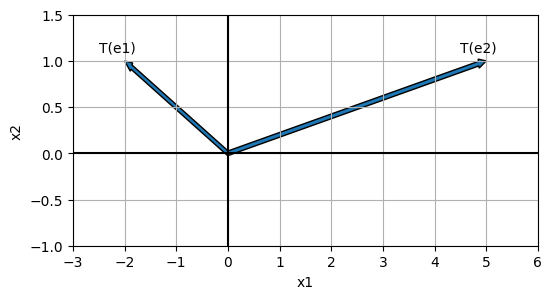

In [ ]:
#@title
Te1 = np.array([-2, 1])
Te2 = np.array([5, 1])

plt.figure(figsize = (6, 3))
plt.arrow(0, 0, Te1[0], Te1[1], width = 0.05, head_width = 0.1, length_includes_head = True)
plt.arrow(0, 0, Te2[0], Te2[1], width = 0.05, head_width = 0.1, length_includes_head = True)
plt.annotate("T(e1)", (Te1[0] - 0.5, Te1[1] + 0.1))
plt.annotate("T(e2)", (Te2[0] - 0.5, Te2[1] + 0.1))
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.xlim((-3, 6))
plt.ylim((-1, 1.5))
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

**Try It! 5:** Show that the mapping $T\left(\left[\begin{array}{c} x_1\\ x_2\end{array}\right]\right) = \left[\begin{array}{c} 2x_1 + x_2\\ x_1 - 5x_2\\ 0\\ -x_1\end{array}\right]$ is a linear transformation from $\mathbb{R}^2$ to $\mathbb{R}^4$ by finding the matrix $A$ such that $T\left(\vec{x}\right) = A\vec{x}$.

> *Solution.*

**Try It! 6:** Let $T:\mathbb{R}^2\to \mathbb{R}^3$ be a linear transformation with $T\left(x_1, x_2\right) = \left(2x_1 - x_2, -3x_1 + x_2, 2x_1 - 3x_2\right)$. Find $\vec{x}$ such that $T\left(\vec{x}\right) = \left(0, -1, -4\right)$.

> *Solution.*